## 2. Iris의 세 가지 품종, 분류해볼 수 있겠어요? [프로젝트]


### 2-1. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다


In [98]:
import sklearn

print(sklearn.__version__)

1.2.1


#### (1) 필요한 모듈 import 하기

In [99]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
# 정확도, 정밀도, 재현율,F1점수, 혼돈행렬


from sklearn.tree import DecisionTreeClassifier # 의사결정트리 분류기를 사용하기 위해 import
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라 분류기를 사용하기 위해 import
from sklearn import svm # Support Vector Machine을 사용하기 위해 import
from sklearn.linear_model import SGDClassifier # 선형분류기인 SGDClassifier를 사용하기 위한 import
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

#### (2) 데이터 준비
+ load_digit()

In [100]:
digits = load_digits() # 데이터셋 가져오기
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [101]:
digits_data = digits.data # Feature Data 지정
digits_label = digits.target # LabelData 지정

In [102]:
# target names 출력해보기
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
# 데이터 describe 해보기
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### (4) train, test 데이터 분리


In [104]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=32)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [105]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)
print('decision_tree_accuracy : ',accuracy_score(y_test, decision_tree_y_pred))


# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)
print('random_forest_accuracy :', accuracy_score(y_test, random_forest_y_pred))


# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model.fit(X_train, y_train)
svm_model_y_pred = svm_model.predict(X_test)
print('svm_model_accuracy :', accuracy_score(y_test, svm_model_y_pred))

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train, y_train)
sgd_model_y_pred = sgd_model.predict(X_test)
print('sgd_model_accuracy :', accuracy_score(y_test, sgd_model_y_pred))

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model.fit(X_train, y_train)
logistic_model_y_pred = logistic_model.predict(X_test)
print('logistic_model_accuracy :', accuracy_score(y_test, logistic_model_y_pred))


decision_tree_accuracy :  0.875
random_forest_accuracy : 0.9861111111111112
svm_model_accuracy : 0.9944444444444445
sgd_model_accuracy : 0.9527777777777777
logistic_model_accuracy : 0.975


#### (6) 모델을 평가해 보기


In [106]:

decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_precision = precision_score(y_test, decision_tree_y_pred, average='macro')  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
decision_tree_recall = recall_score(y_test, decision_tree_y_pred, average='macro')
decision_tree_f1 = f1_score(y_test, decision_tree_y_pred, average='macro')
decision_tree_cm = confusion_matrix(y_test, decision_tree_y_pred)
print(f'decision_tree_accuracy : {decision_tree_accuracy:.2f}')
print(f'decision_tree_precision : {decision_tree_precision:.2f}')
print(f'decision_tree_recall : {decision_tree_recall:.2f}')
print(f'decision_tree_f1 : {decision_tree_f1:.2f}')
# print('decision_tree_cm : ',decision_tree_cm)
print('------------------------------------------------')


random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_precision = precision_score(y_test, random_forest_y_pred, average='macro')  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
random_forest_recall = recall_score(y_test, random_forest_y_pred, average='macro')
random_forest_f1 = f1_score(y_test, random_forest_y_pred, average='macro')
random_forest_cm = confusion_matrix(y_test, random_forest_y_pred)
print(f'random_forest_accuracy : {random_forest_accuracy:.2f}')
print(f'random_forest_precision : {random_forest_precision:.2f}')
print(f'random_forest_recall : {random_forest_recall:.2f}')
print(f'random_forest_f1 : {random_forest_f1:.2f}')
print('------------------------------------------------')

svm_model_accuracy = accuracy_score(y_test, svm_model_y_pred)
svm_model_precision = precision_score(y_test, svm_model_y_pred, average='macro')  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
svm_model_recall = recall_score(y_test, svm_model_y_pred, average='macro')
svm_model_f1 = f1_score(y_test, svm_model_y_pred, average='macro')
svm_model_cm = confusion_matrix(y_test, svm_model_y_pred)
print(f'svm_model_accuracy : {svm_model_accuracy:.2f}')
print(f'svm_model_precision : {svm_model_precision:.2f}')
print(f'svm_model_recall : {svm_model_recall:.2f}')
print(f'svm_model_f1 : {svm_model_f1:.2f}')
print('------------------------------------------------')
sgd_model_accuracy = accuracy_score(y_test, sgd_model_y_pred)
sgd_model_precision = precision_score(y_test, sgd_model_y_pred, average='macro')  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
sgd_model_recall = recall_score(y_test, sgd_model_y_pred, average='macro')
sgd_model_f1 = f1_score(y_test, sgd_model_y_pred, average='macro')
sgd_model_cm = confusion_matrix(y_test, sgd_model_y_pred)
print(f'sgd_model_accuracy : {sgd_model_accuracy:.2f}')
print(f'sgd_model_precision : {sgd_model_precision:.2f}')
print(f'sgd_model_recall : {sgd_model_recall:.2f}')
print(f'sgd_model_f1 : {sgd_model_f1:.2f}')
print('------------------------------------------------')
logistic_model_accuracy = accuracy_score(y_test, logistic_model_y_pred)
logistic_model_precision = precision_score(y_test, logistic_model_y_pred, average='macro')  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
logistic_model_recall = recall_score(y_test, logistic_model_y_pred, average='macro')
logistic_model_f1 = f1_score(y_test, logistic_model_y_pred, average='macro')
logistic_model_cm = confusion_matrix(y_test, logistic_model_y_pred)
print(f'logistic_model_accuracy : {logistic_model_accuracy:.2f}')
print(f'logistic_model_precision : {logistic_model_precision:.2f}')
print(f'logistic_model_recall : {logistic_model_recall:.2f}')
print(f'logistic_model_f1 : {logistic_model_f1:.2f}')


decision_tree_accuracy : 0.88
decision_tree_precision : 0.88
decision_tree_recall : 0.87
decision_tree_f1 : 0.87
------------------------------------------------
random_forest_accuracy : 0.99
random_forest_precision : 0.98
random_forest_recall : 0.98
random_forest_f1 : 0.98
------------------------------------------------
svm_model_accuracy : 0.99
svm_model_precision : 0.99
svm_model_recall : 0.99
svm_model_f1 : 0.99
------------------------------------------------
sgd_model_accuracy : 0.95
sgd_model_precision : 0.96
sgd_model_recall : 0.95
sgd_model_f1 : 0.95
------------------------------------------------
logistic_model_accuracy : 0.97
logistic_model_precision : 0.97
logistic_model_recall : 0.97
logistic_model_f1 : 0.97


In [107]:
print(classification_report(y_test, decision_tree_y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.75      0.83      0.79        36
           2       0.75      0.84      0.79        32
           3       0.92      0.86      0.89        56
           4       0.85      0.90      0.88        31
           5       0.92      0.97      0.95        36
           6       0.97      0.94      0.96        34
           7       0.94      0.88      0.91        34
           8       0.88      0.78      0.82        27
           9       0.79      0.83      0.81        36

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.88       360



In [108]:
print(classification_report(y_test, random_forest_y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        36
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        34
           8       0.96      0.89      0.92        27
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360



In [109]:
print(classification_report(y_test, svm_model_y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       0.95      1.00      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [110]:
print(classification_report(y_test, sgd_model_y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.78      0.88        36
           2       1.00      0.97      0.98        32
           3       0.98      0.95      0.96        56
           4       1.00      0.97      0.98        31
           5       0.97      0.94      0.96        36
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34
           8       0.75      1.00      0.86        27
           9       0.86      1.00      0.92        36

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



In [124]:
print(classification_report(y_test, logistic_model_y_pred)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36



#### (1) 필요한 모듈 import 하기

In [112]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
# 정확도, 정밀도, 재현율,F1점수, 혼돈행렬

from sklearn.preprocessing import StandardScaler # 스케일링

from sklearn.tree import DecisionTreeClassifier # 의사결정트리 분류기를 사용하기 위해 import
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라 분류기를 사용하기 위해 import
from sklearn import svm # Support Vector Machine을 사용하기 위해 import
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier # 선형분류기인 SGDClassifier를 사용하기 위한 import
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

#### (2) 데이터 준비
+ load_wine()

In [113]:
wine = load_wine() # 데이터셋 가져오기
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [114]:
wine_data = wine.data # Feature Data 지정
wine_label = wine.target # LabelData 지정

In [115]:
# target names 출력해보기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [116]:
# 데이터 describe 해보기
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

#### (4) train, test 데이터 분리


In [117]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=32)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [118]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)
print('decision_tree_accuracy : ',accuracy_score(y_test, decision_tree_y_pred))


# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)
print('random_forest_accuracy :', accuracy_score(y_test, random_forest_y_pred))

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model.fit(X_train, y_train)
svm_model_y_pred = svm_model.predict(X_test)
print('svm_model_accuracy :', accuracy_score(y_test, svm_model_y_pred))

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train, y_train)
sgd_model_y_pred = sgd_model.predict(X_test)
print('sgd_model_accuracy :', accuracy_score(y_test, sgd_model_y_pred))

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model.fit(X_train, y_train)
logistic_model_y_pred = logistic_model.predict(X_test)
print('logistic_model_accuracy :', accuracy_score(y_test, logistic_model_y_pred))


decision_tree_accuracy :  0.9166666666666666
random_forest_accuracy : 0.9722222222222222
svm_model_accuracy : 0.6111111111111112
sgd_model_accuracy : 0.3888888888888889
logistic_model_accuracy : 0.9166666666666666


#### (6) 모델을 평가해 보기


In [136]:
def score_print(model_type,y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro',zero_division=1)  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{model_type}_accuracy : {accuracy:.5f}')
    print(f'{model_type}_precision : {precision:.5f}')
    print(f'{model_type}_recall : {recall:.5f}')
    print(f'{model_type}_f1 : {f1:.5f}')
    print('-----------------------------------')

In [137]:
score_print('decision_tree',y_test,decision_tree_y_pred)
score_print('random_forest',y_test,random_forest_y_pred)
score_print('svm_model',y_test,svm_model_y_pred)
score_print('sgd_model',y_test,sgd_model_y_pred)
score_print('logistic_model',y_test,logistic_model_y_pred)

decision_tree_accuracy : 0.91667
decision_tree_precision : 0.91002
decision_tree_recall : 0.90000
decision_tree_f1 : 0.90393
-----------------------------------
random_forest_accuracy : 0.97222
random_forest_precision : 0.96970
random_forest_recall : 0.96667
random_forest_f1 : 0.96658
-----------------------------------
svm_model_accuracy : 0.61111
svm_model_precision : 0.77922
svm_model_recall : 0.57083
svm_model_f1 : 0.47639
-----------------------------------
sgd_model_accuracy : 0.38889
sgd_model_precision : 0.77083
sgd_model_recall : 0.41667
sgd_model_f1 : 0.29206
-----------------------------------
logistic_model_accuracy : 0.91667
logistic_model_precision : 0.91002
logistic_model_recall : 0.90000
logistic_model_f1 : 0.90393
-----------------------------------


+ svm_model, sgd_model의 예측성능 높이는 방법
    1. 데이터 스케일링 : SVM과 SGD는 데이터의 스케일에 민감 -> StandardScaler나 MinMaxScaler를 이용하여 스케일 진행 추천
    2. 하이퍼파라미터 튜닝 
        + SVM
            + C : 오분류에 대한 패널티 결정
                + 작은값 : 부드러운 결정 경계 / 큰 값 : 복잡한 결정 경계
            + kernel : 데이터를 고차원 공간으로 변환하는 방법 결정
                + linear, poly, rbf, sigmoid 등 옵션이 있음
        + SGB 
            + alpha : 정규화 강도
            + penalty : 사용할 정규화 방법
                + l1,l2,elasticnet
    3. 교차 검증 : GridSearchCV, RandomizedSearchCV
    4. 특성 선택, 추출 : 중요하지 않은 특성 제거, PCA(주성분 분석)으로 특성 추출
+ 데이터 스케일링과 하이퍼파라미터 변경 적용해서 예측 성능을 높임


In [138]:
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM 모델 학습 및 평가
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)  # 이 값들은 일반적으로 좋은 성능을 보이는 값들입니다. 하지만 최적의 값은 데이터에 따라 다를 수 있습니다.
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# SGD 모델 학습 및 평가
sgd_model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
sgd_pred = sgd_model.predict(X_test_scaled)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
print(f"SGD Accuracy: {sgd_accuracy:.4f}")

SVM Accuracy: 0.9444
SGD Accuracy: 0.9444


In [139]:
score_print('svm_model',y_test,svm_pred)
score_print('sgd_model',y_test,sgd_pred)

svm_model_accuracy : 0.94444
svm_model_precision : 0.93333
svm_model_recall : 0.93333
svm_model_f1 : 0.93333
-----------------------------------
sgd_model_accuracy : 0.94444
sgd_model_precision : 0.93333
sgd_model_recall : 0.93333
sgd_model_f1 : 0.93333
-----------------------------------


### 2-3. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다
---


#### (1) 필요한 모듈 import 하기

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix
# 정확도, 정밀도, 재현율,F1점수, 혼돈행렬

from sklearn.preprocessing import StandardScaler # 스케일링

from sklearn.tree import DecisionTreeClassifier # 의사결정트리 분류기를 사용하기 위해 import
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라 분류기를 사용하기 위해 import
from sklearn import svm # Support Vector Machine을 사용하기 위해 import
from sklearn.svm import SVC

from sklearn.linear_model import SGDClassifier # 선형분류기인 SGDClassifier를 사용하기 위한 import
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import

#### (2) 데이터 준비
+ load_wine()

In [140]:
breast = load_breast_cancer() # 데이터셋 가져오기
breast.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### (3) 데이터 이해하기
+ Feature Data 지정하기
+ Label Data 지정하기
+ Target Names 출력해 보기
+ 데이터 Describe 해 보기

In [141]:
breast_data = breast.data # Feature Data 지정
breast_label = breast.target # LabelData 지정

In [142]:
# target names 출력해보기
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [143]:
# 데이터 describe 해보기
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### (4) train, test 데이터 분리


In [144]:
X_train, X_test, y_train, y_test = train_test_split(breast_data, breast_label, test_size=0.2, random_state=32)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


#### (5) 다양한 모델로 학습시켜보기
+ Decision Tree 사용해 보기
+ Random Forest 사용해 보기
+ SVM 사용해 보기
+ SGD Classifier 사용해 보기
+ Logistic Regression 사용해 보기

In [145]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)
print('decision_tree_accuracy : ',accuracy_score(y_test, decision_tree_y_pred))


# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)
print('random_forest_accuracy :', accuracy_score(y_test, random_forest_y_pred))

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model.fit(X_train, y_train)
svm_model_y_pred = svm_model.predict(X_test)
print('svm_model_accuracy :', accuracy_score(y_test, svm_model_y_pred))

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model.fit(X_train, y_train)
sgd_model_y_pred = sgd_model.predict(X_test)
print('sgd_model_accuracy :', accuracy_score(y_test, sgd_model_y_pred))

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model.fit(X_train, y_train)
logistic_model_y_pred = logistic_model.predict(X_test)
print('logistic_model_accuracy :', accuracy_score(y_test, logistic_model_y_pred))


decision_tree_accuracy :  0.8771929824561403
random_forest_accuracy : 0.9385964912280702
svm_model_accuracy : 0.868421052631579
sgd_model_accuracy : 0.9035087719298246
logistic_model_accuracy : 0.9210526315789473


#### (6) 모델을 평가해 보기


In [146]:
def score_print(model_type,y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro',zero_division=1)  # 'macro'는 다중 클래스 문제에 대한 평균을 의미합니다.
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    print(f'{model_type}_accuracy : {accuracy:.5f}')
    print(f'{model_type}_precision : {precision:.5f}')
    print(f'{model_type}_recall : {recall:.5f}')
    print(f'{model_type}_f1 : {f1:.5f}')
    print('-----------------------------------')

In [155]:
def model_fit_pred(model_name_str,model,X_train, y_train,X_test,y_test) :
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name_str, 'accuracy : ',accuracy_score(y_test, y_pred))
    return y_pred

In [160]:
# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred('DecisionTreeClassifier',logistic_model,X_train,y_train,X_test,y_test)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred('RandomForestClassifier',random_forest,X_train,y_train,X_test,y_test)

# SVM 사용해 보기
svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model_y_pred=model_fit_pred('svm_model',svm_model,X_train,y_train,X_test,y_test)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(random_state=32) # SGD Classifier 모델 객체 생성
sgd_model_y_pred=model_fit_pred('sgd_model',sgd_model,X_train,y_train,X_test,y_test)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model_y_pred=model_fit_pred('logistic_model',logistic_model,X_train,y_train,X_test,y_test)

DecisionTreeClassifier accuracy :  0.9210526315789473
RandomForestClassifier accuracy :  0.9385964912280702
svm_model accuracy :  0.868421052631579
sgd_model accuracy :  0.9035087719298246
logistic_model accuracy :  0.9210526315789473


In [165]:
# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=1500,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model_y_pred=model_fit_pred('logistic_model',logistic_model,X_train,y_train,X_test,y_test)

logistic_model accuracy :  0.9122807017543859


c:\Users\qwert\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model_y_pred=model_fit_pred('logistic_model',logistic_model,X_train,y_train,X_test,y_test)

logistic_model accuracy :  0.9210526315789473


In [161]:
score_print('decision_tree',y_test,decision_tree_y_pred)
score_print('random_forest',y_test,random_forest_y_pred)
score_print('svm_model',y_test,svm_model_y_pred)
score_print('sgd_model',y_test,sgd_model_y_pred)
score_print('logistic_model',y_test,logistic_model_y_pred)

decision_tree_accuracy : 0.92105
decision_tree_precision : 0.91828
decision_tree_recall : 0.91461
decision_tree_f1 : 0.91636
-----------------------------------
random_forest_accuracy : 0.93860
random_forest_precision : 0.93382
random_forest_recall : 0.93734
random_forest_f1 : 0.93549
-----------------------------------
svm_model_accuracy : 0.86842
svm_model_precision : 0.88119
svm_model_recall : 0.84221
svm_model_f1 : 0.85473
-----------------------------------
sgd_model_accuracy : 0.90351
sgd_model_precision : 0.89710
sgd_model_recall : 0.90032
sgd_model_f1 : 0.89863
-----------------------------------
logistic_model_accuracy : 0.92105
logistic_model_precision : 0.91828
logistic_model_recall : 0.91461
logistic_model_f1 : 0.91636
-----------------------------------


In [166]:
# 여기복붙
# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) # decisionTree 분류기 객체 생성
decision_tree_y_pred=model_fit_pred('DecisionTreeClassifier',decision_tree,X_train_scaled,y_train,X_test_scaled,y_test)

# Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest 분류기 객체 생성
random_forest_y_pred=model_fit_pred('RandomForestClassifier',random_forest,X_train_scaled,y_train,X_test_scaled,y_test)

# SVM 사용해 보기
#svm_model = svm.SVC(random_state=32) # SVM 모델 객체 생성
svm_model = SVC(kernel='rbf', C=10, gamma=0.1)  # 이 값들은 일반적으로 좋은 성능을 보이는 값들입니다. 하지만 최적의 값은 데이터에 따라 다를 수 있습니다.
svm_model_y_pred=model_fit_pred('svm_model',svm_model,X_train,y_train,X_test,y_test)

# SGD Classifier 사용해 보기
sgd_model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.001, max_iter=1000, random_state=42)
sgd_model_y_pred=model_fit_pred('sgd_model',sgd_model,X_train_scaled,y_train,X_test_scaled,y_test)

# Logistic Regression 사용해 보기
logistic_model = LogisticRegression(max_iter=3000,random_state=32) # Logistic Regression  모델 객체 생성
logistic_model_y_pred=model_fit_pred('logistic_model',logistic_model,X_train_scaled,y_train,X_test_scaled,y_test)
print('----------------------------------')

score_print('decision_tree',y_test,decision_tree_y_pred)
score_print('random_forest',y_test,random_forest_y_pred)
score_print('svm_model',y_test,svm_model_y_pred)
score_print('sgd_model',y_test,sgd_model_y_pred)
score_print('logistic_model',y_test,logistic_model_y_pred)


DecisionTreeClassifier accuracy :  0.8771929824561403
RandomForestClassifier accuracy :  0.9385964912280702
svm_model accuracy :  0.6140350877192983
sgd_model accuracy :  0.9824561403508771
logistic_model accuracy :  0.9912280701754386
----------------------------------
decision_tree_accuracy : 0.87719
decision_tree_precision : 0.87045
decision_tree_recall : 0.87045
decision_tree_f1 : 0.87045
-----------------------------------
random_forest_accuracy : 0.93860
random_forest_precision : 0.93382
random_forest_recall : 0.93734
random_forest_f1 : 0.93549
-----------------------------------
svm_model_accuracy : 0.61404
svm_model_precision : 0.80702
svm_model_recall : 0.50000
svm_model_f1 : 0.38043
-----------------------------------
sgd_model_accuracy : 0.98246
sgd_model_precision : 0.98149
sgd_model_recall : 0.98149
sgd_model_f1 : 0.98149
-----------------------------------
logistic_model_accuracy : 0.99123
logistic_model_precision : 0.99296
logistic_model_recall : 0.98864
logistic_model_f

### 회고
---
#### 프로젝트 목표
1. 3가지 데이터셋의 구성을 파악하고, 데이터를 이해하는 과정이 포함되어있는가?	
    - feature와 label 선정을 위한 데이터 분석과정을 전개함
2. 3가지 데이터셋에 대해 각각 5가지 모델을 이용하여 학습을 수행하고 결과값을 얻었는가?	
    - 모델학습 및 테스트가 정상적으로 수행되고, 결과값을 얻었음
3. 3가지 데이터셋에 대해 모델의 평가 지표를 선택하고, 그 이유를 근거를 바탕으로 서술하였는가?	
    - 모델학습을 통해 얻은 결과물을 바탕으로 평가지표를 선택하고, 본인의 의견을 서술하였음

#### 성과 및 결과
1. 공통
    - 함수화 : 반복되는 부분을 간결하게 하기 위하여 작성
        - model fit,predict 부분을 함수화 하여 코드를 간결하게 표현
        - 각각의 평가지표를 짧게 확인할 수 있도록 함수화 하여 표현
2. 손글씨 분류
3. 와인 분류
    - svm_model, sgd_model의 예측 성능이 떨어짐
        - 데이터 스케일링과 하이퍼파라미터 변경 적용해서 예측 성능을 높임
            + svm모델 accuracy, precision, recall, f1
                + 개선 전 : [0.61111, 0.77922, 0.57083, 0.47639]
                + 개선 후 : [0.94444, 0.93333, 0.93333, 0.93333]
            + sgd모델 accuracy, precision, recall, f1
                + 개선전 :  [0.38889, 0.77083, 0.41667 , 0.29206]
                + 개선 후 : [0.94444, 0.93333, 0.93333, 0.93333]
        
4. 유방암 여부 진단


#### 배운 점
- LogisticRegression 모델 오류
    - max_iter 수치 수정
    - 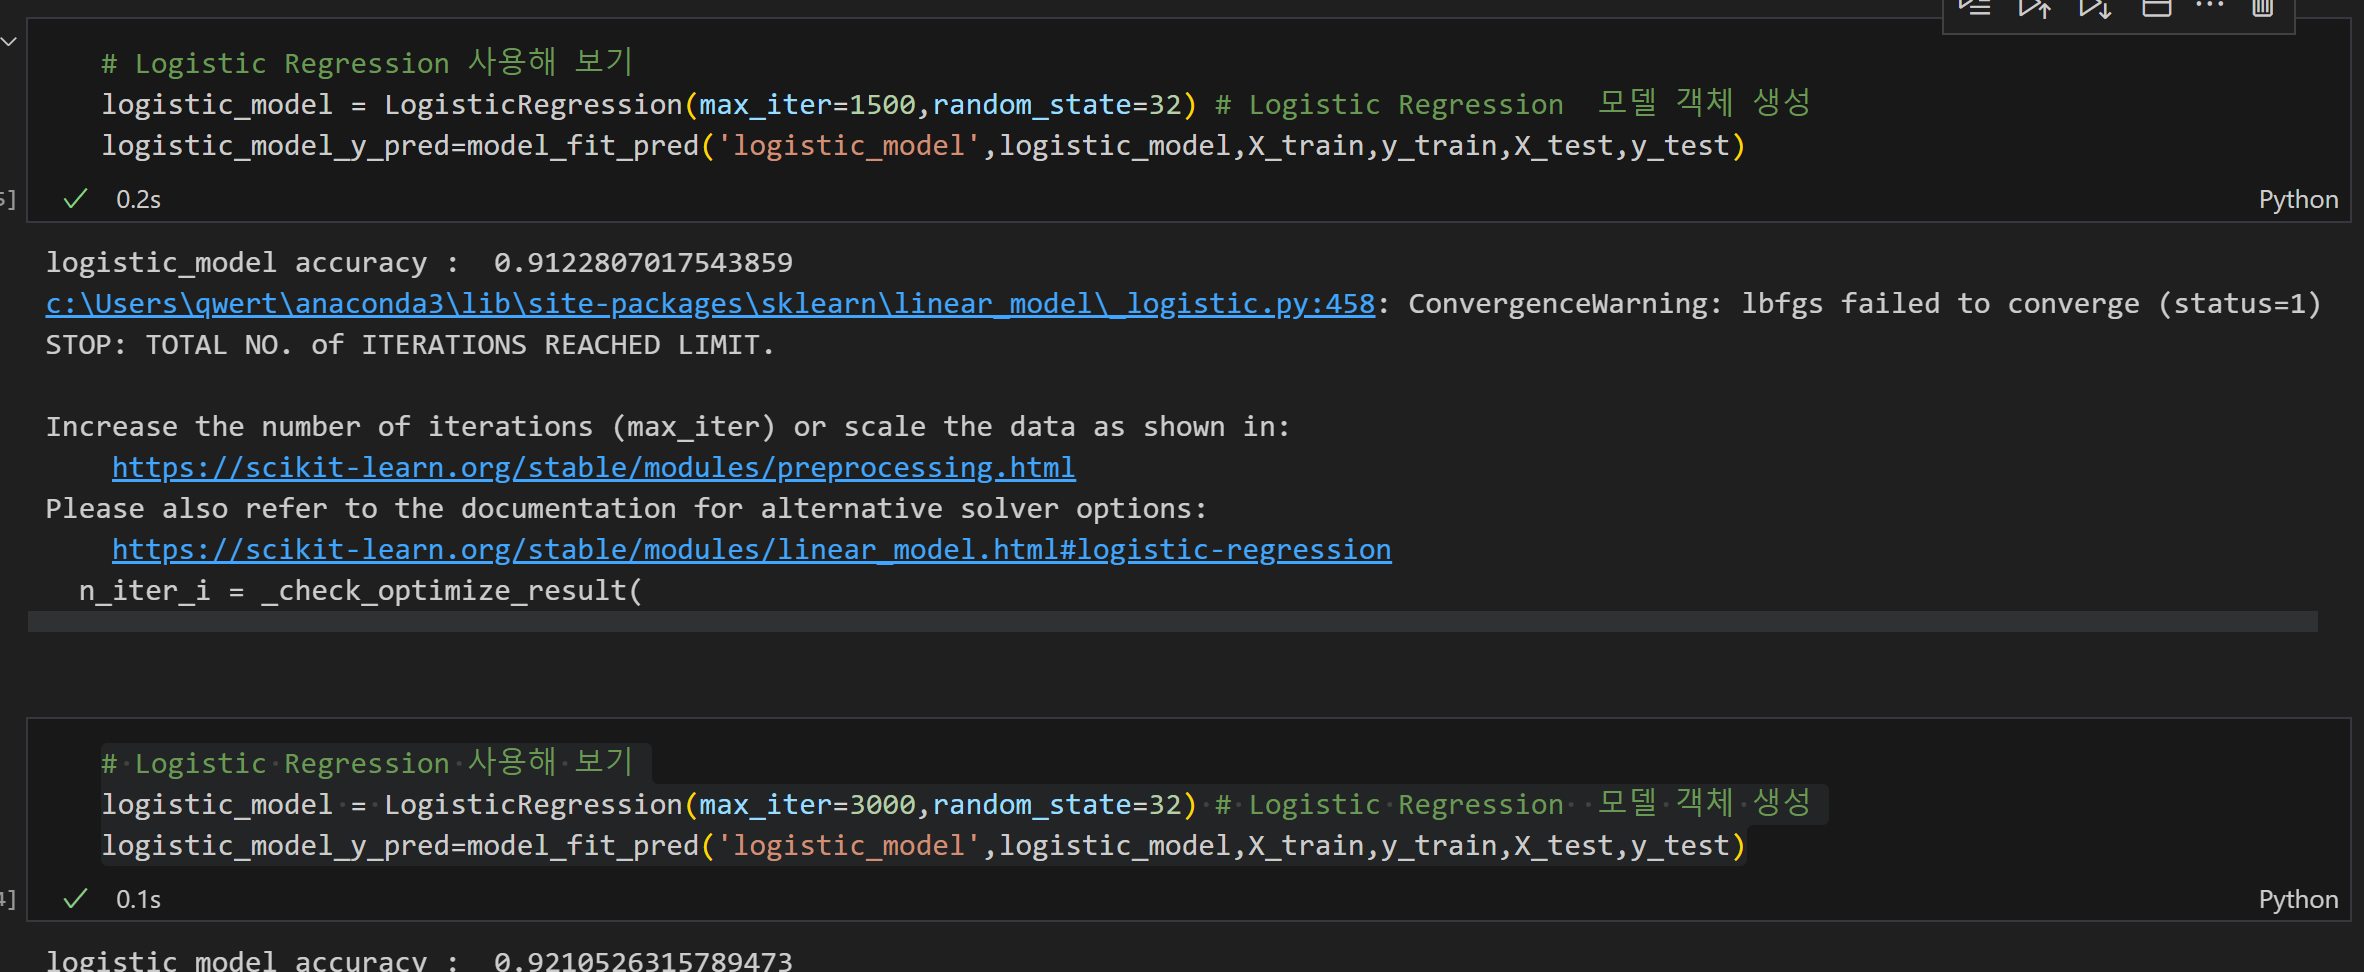
+ svm_model, sgd_model의 예측성능 높이는 방법
    1. 데이터 스케일링 : SVM과 SGD는 데이터의 스케일에 민감 -> StandardScaler나 MinMaxScaler를 이용하여 스케일 진행 추천
    2. 하이퍼파라미터 튜닝 
        + SVM
            + C : 오분류에 대한 패널티 결정
                + 작은값 : 부드러운 결정 경계 / 큰 값 : 복잡한 결정 경계
            + kernel : 데이터를 고차원 공간으로 변환하는 방법 결정
                + linear, poly, rbf, sigmoid 등 옵션이 있음
        + SGB 
            + alpha : 정규화 강도
            + penalty : 사용할 정규화 방법
                + l1,l2,elasticnet
    3. 교차 검증 : GridSearchCV, RandomizedSearchCV
    4. 특성 선택, 추출 : 중요하지 않은 특성 제거, PCA(주성분 분석)으로 특성 추출

#### 개선할 점
+ SVM, SGB 외에도 다른 모델의 하이퍼 파라미터 값을 조정하여 결과치에 어떤 영향을 미치는지 파악해 보면 좋을 것 같다.
+ 

#### 결론
+ 



